# Homework 4:  Linear models
This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 
​
You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

​
This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [3]:
#INSERT CODE HERE
library(tidyverse)
data <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')
d1 <- data %>% select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>% drop_na()
head(d1)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘readr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Warning message:
“package ‘forcats’ was built under R version 3.6.2”
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

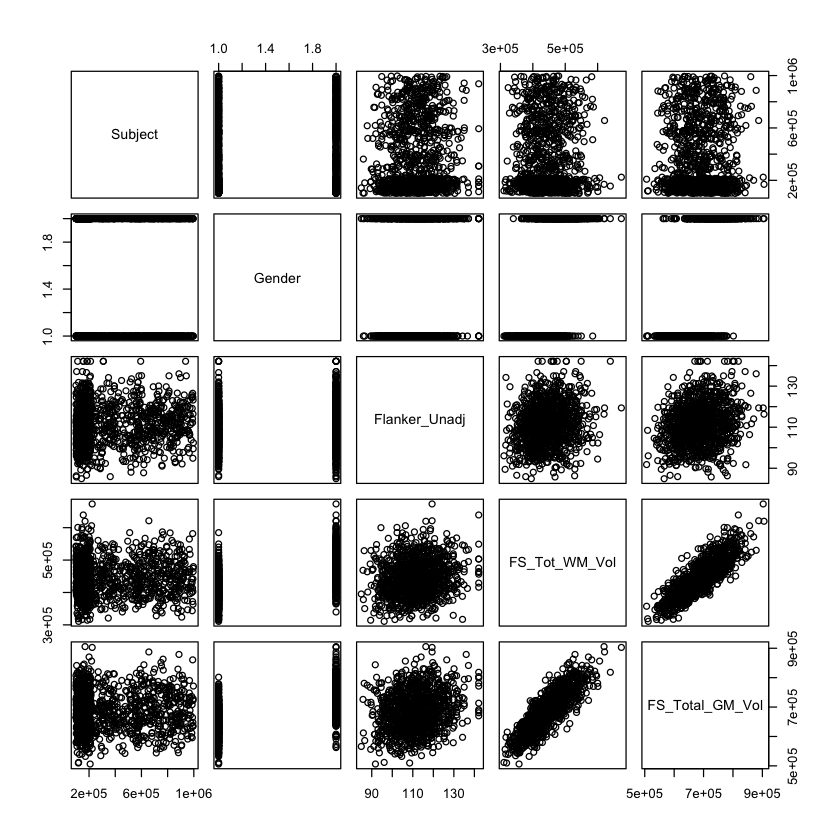

In [10]:
#INSERT CODE HERE
pairs(d1)

> FS_Tot_WM_Vol and FS_Total_GM_Vol are strongly positively correlated. There is slight positive correlation between Flanker_Unadj and FS_Total_GM_Vol. One of the genders seems to have higher FS_Tot_WM_Vol and FS_Total_GM_Vol. There is no correlation between any other pairs of variables.


---
## Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [26]:
#INSERT CODE HERE
simple.fit = lm(Flanker_Unadj~FS_Total_GM_Vol,data=d1)
summary(simple.fit)
simple.fit$coef
confint(simple.fit)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> Very small p-value for the $\beta_1$ coefficient indicate that we can reject the null hypothesis of $\beta_1=0$ or that there is no relationship between FS_Total_GM_Vol and Flanker_Unadj. F-statistic with a value much greater than 1 also instills confidence that we can reject the null hypothesis which states that there is no relationship between the 2 variables. Both these statistics indicate that grey matter volume is significantly associated with Flanker Task performance.
Even though R^2 value is low, it only means that FS_Total_GM_Vol does not explain the variance in Flanker_Unadj. In other words, Flanker_Unadj data points may lie far from the fitted regression line, but the line itself is able to capture the trend between the 2 variables. 


---
## Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



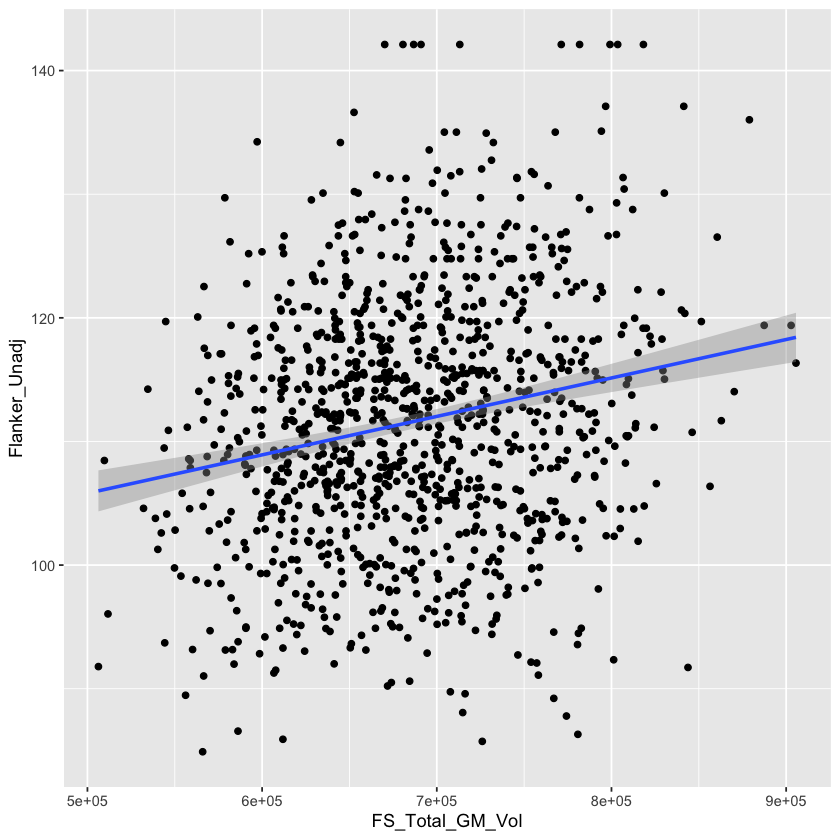

In [29]:
#INSERT CODE HERE
d1 %>% ggplot(aes(x=FS_Total_GM_Vol, y=Flanker_Unadj) ) + geom_point() + geom_smooth(method=lm, se=TRUE, fullrange=FALSE, level=0.95)

> There is huge variance in Flanker_Unadj values as expected based on the regression analysis previously. The confidence intervals are narrow towards the center of the graph since the sample size at that point is huge. However because of fewer samples on the ends of the line, the confidence interval is much larger indicating we cannot be precise in our predictions. 

---

## Reflection (1 pt)

What do you conclude based on the analyses above?

> The low $R^2$ value indicate that the data is naturally very variable(as seen in the plot above) and that's why FS_Total_GM_Vol does not explain the variance in Flanker_Unadj. Low p value for the coefficient, indicates that the linear model is a confident one. But considering both together, a linear model is probably not a good way to find an associating function between the 2 variables. A more flexible model would be more accurate. 

**DUE:** 5pm EST, March 11, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*